# **<span style="color:deepskyblue">Delta Time</span>**

Wir hatten fest gelegt, dass eine Frame Rate von 60 oder 120 niemals überaschritten werden darf.\
Doch was ist mit dem Bereich darunter?

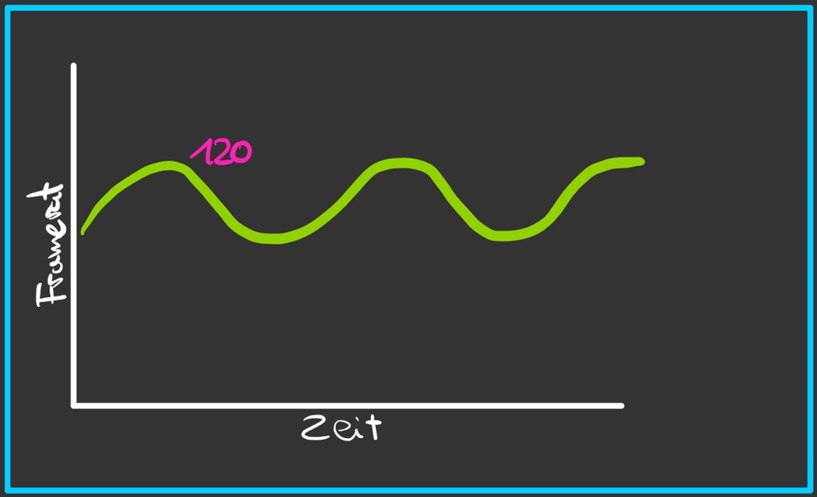

Irgendwie müssen wir dafür sorgen, dass das Spiel weder zu schnell noch zu langsam läuft\
und wir best Case, kontinuierlich eine gleiche Framerate behalten.

***

## **<span style="color:deepskyblue">Delta Time</span>**

+ Delta Time misst wie lange es gedauert hat um einen Frame zu erstellen
+ wenn die Framerate bei 120 FPS ist, dann ist Delta Time beispielsweise  1s / 120 = 0,00834
+ mit dieser Information können wir das Spiel mit einer konstanten Geschwindigkeit, unabhängig von der Framerate laufen lassen
+ jede Geschwindigkeit im Spiel wird dann immer und grundsätzlich mit Delta Time multipliziert

***

| Speed Pixels per Frame | Frames per Sec | Delta Time Secs | Original Movement per Sec | Delta Movement per Sec |
|:---------|:-------------|:--------------|:--------------|:--------------|
| 10 px | 30 | 1 / 30 = 0.033 | 10 * 30 = 300 | 10 * 30 * 0.033 = 10 |
| 10 px | 60 | 1 / 60 = 0.017 | 10 * 60 = 600 | 10 * 60 * 0.017 = 10 |
| 10 px | 120 | 1 / 120 = 0.08 | 10 * 120 = 1200 | 10 * 120 * 0.08 = 10 |

***

In [ ]:
# GAME LOOP
while True:
    # 1. Player Inputs 
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit() 
            sys.exit()
        
    #Limiting Frame Rate
    clock.tick(60)
    print(clock.get_fps())                                                      # Hier können wir uns die Framerate anzeigen lassen
    
    # Analog Stick
    x_speed = round(pygame.joystick.Joystick(0).get_axis(0))
    y_speed = round(pygame.joystick.Joystick(0).get_axis(1))
    move(x_speed, y_speed)
    
    laser_rectangle.y -= 7 * delta_time                                         # Die Geschwindigkeit des Lasers mit Delta Time multiplizieren
    
    # 2. Updates
    display.fill((0, 0, 0))
    display.blit(background_surface, (0, 0))
    display.blit(ship_surface, ship_rectangle)
    display.blit(laser_surface, laser_rectangle)
    display.blit(title_surface, title_rectangle)
    
    # Draw custom Rectangles here
    pygame.draw.rect(display, "white", title_rectangle.inflate(50, 20), width=10, border_radius=5)
    
    # draw final frame
    pygame.display.update()

## **<span style="color:deepskyblue">Delta Time berechnen</span>**

In [ ]:
delta_time = clock.tick(60) / 1000                                              # 1000ms in einer Sekunde | Statt der clock Zeile

***

## **<span style="color:deepskyblue">Delta Time Integer Bug</span>**

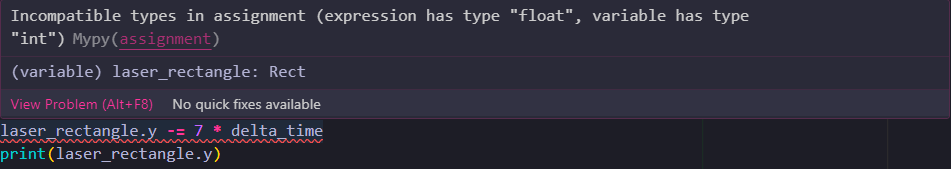

+ Werte können nur als Integer aktzeptiert werden
+ wir versuchen aber an dieser Stelle mit float Values zu arbeiten
+ -> das führt zu einem Zero Movement Bug 
+ denn aus 0.7 wird eine 0, wenn diese zum Integer konvertiert wird
+ danach ändert sich die 0 auch nicht mehr

In [ ]:
# Lösung
laser_rectangle.y -= round(7 * delta_time)                                      # Für positive Werte würde das funktionieren
laser_rectangle.y -= round(200 * delta_time)                                    # Ein aktueller Workaround ist große Zahlen zu verwenden

***

Welche Framerate auch immer nun beim Limiter übergeben wird, die Geschwindigkeit des Spiels bleibt immer gleich.